# Introduction
This project is the analysis of New York city's 311-Service data (calls recieved by New York Police Dept.) in Apri to December 2015. The problem statement was provided on Kaggle.
The data cleaning and preparation and statistical analysis was done in python (Jupyter Notebook). The rest of analysis and presentation was done in Microsoft Powe BI.

# Sources
Kaggle: https://www.kaggle.com/datasets/shubhammore12/nyc-311-customer-service-requests-analysis

Nyc Opendata: https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9

# About Dataset *(as provided on kaggle)
+ Description:
NYC 311's mission is to provide the public with quick and easy access to all New York City government services and information while offering the best customer service. Each day, NYC311 receives thousands of requests related to several hundred types of non-emergency services, including noise complaints, plumbing issues, and illegally parked cars. These requests are received by NYC311 and forwarded to the relevant agencies such as the police, buildings, or transportation. The agency responds to the request, addresses it, and then closes it.

+ Problem Objective :
Perform a service request data analysis of New York City 311 calls. You will focus on the data wrangling techniques to understand the pattern in the data and also visualize the major complaint types.

+ Domain: Customer Service

+ Analysis Tasks to be performed:
*(Perform a service request data analysis of New York City 311 calls)

Import a 311 NYC service request.
Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)
Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.
Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

+ Perform a statistical test for the following:
*Please note: For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.

Whether the average response time across complaint types is similar or not (overall)
Are the type of complaint or service requested and location related?

In [ ]:
import pandas as pd    #for data cleaning and preparation
import statsmodels.api as sm  # for statistical testing
from statsmodels.formula.api import ols # Ordinary Least Squares (to use for statistical tests)

From Opendata NYC-311's description of dataset, relevent columns are selected (14 columns out of 41 total columns) and are imported.

In [ ]:
dataset = pd.read_csv("C:/Users/Acaelus T/Desktop/NYC311data_csv/NYC311data.csv",
                      usecols=["Unique Key","Created Date","Closed Date","Agency",
                              "Complaint Type","Location Type","Incident Zip","City",
                              "Status","Due Date","Borough","Latitude","Longitude",
                              "Location"])

In [ ]:
# View data info
dataset.info(memory_usage="deep")

In [ ]:
# view dataset
dataset.tail(5)

In [ ]:
#change date columns datatype from object to datetime
dataset["Created Date"] = pd.to_datetime(dataset["Created Date"])

In [ ]:
dataset["Closed Date"] = pd.to_datetime(dataset["Closed Date"])

In [ ]:
#remove space from column names
dataset.rename(columns = ({"Unique Key":"Unique_Key", "Created Date":"Created_Date","Closed Date":"Closed_Date",
                           "Complaint Type":"Complaint_Type", "Location Type":"Location_Type", "Incident Zip":"Incident_Zip"}),inplace=True)

In [ ]:
#calculate time taken to close request 
dataset.insert(14,"Request_Closing_Time",(dataset.Closed_Date - dataset.Created_Date).astype("timedelta64[m]"),True)

In [ ]:
dataset.insert(15,"Request_Closing_Time_hour",(dataset.Closed_Date - dataset.Created_Date).astype("timedelta64[h]"),True)

In [ ]:
dataset['Request_Closing_Time_hour'] = dataset["Request_Closing_Time"]/60

In [ ]:
dataset.to_csv("C:/Users/Acaelus T/Desktop/NYC311data_csv/NYC311_cleaned.csv",index = False)

# statistical tests

In [ ]:
dataset = pd.read_csv("C:/Users/Acaelus T/Desktop/NYC311data_csv/NYC311_cleaned.csv")

*One Way Analysis of Variance of Response Time wrt City

H0 : Average response time across cities is equal

HA : Average response time across cities is not equal

alpha = 0.05

In [ ]:
model_city_time = ols('Request_Closing_Time_hour ~ City', data = dataset).fit()

In [ ]:
anova_city_time = sm.stats.anova_lm(model_city_time,typ=1)
anova_city_time

Result : p=0, ie. p < alpha

H0 is rejected

    Average response time across cities is not equal

*One Way Analysis of Variance of Response Time wrt Complaint Type

H0 : Average response time across different complaint types is equal

HA : Average response time across different complaint types is not equal

alpha = 0.05

In [ ]:
model_comp_time = ols('Request_Closing_Time_hour ~ Complaint_Type', data = dataset).fit()
anova_comp_time = sm.stats.anova_lm(model_comp_time,typ=1)
anova_comp_time

Result : p=0, ie. p < alpha

H0 is rejected

    Average response time across different complaint types is not equal

In [ ]:
anova_comp_time.to_csv("C:/Users/Acaelus T/Desktop/NYC311data_csv/NYC311_anova_Ctype.csv")
anova_city_time.to_csv("C:/Users/Acaelus T/Desktop/NYC311data_csv/NYC311_anova_city.csv")

*Correlation between Complaint_type, City, Borough, Location_Type

In [ ]:
correlation = dataset[["Complaint_Type","Location_Type","City","Borough"]

In [ ]:
correlation['Complaint_Type']=correlation['Complaint_Type'].astype('category').cat.codes
correlation['City']= correlation['City'].astype('category').cat.codes
correlation['Borough']= correlation['Borough'].astype('category').cat.codes
correlation['Location_Type']= correlation['Location_Type'].astype('category').cat.codes

In [ ]:
correlation.info()

In [ ]:
correlation_res = correlation.corr(method='pearson')
correlation_res

From above correlation table, we conclude that:
    
    there is no correlation between Complaint_Type & City
    
    there is no correlation between Complaint_Type & Location Type
    
    there is no correlation between Complaint_Type & Borough

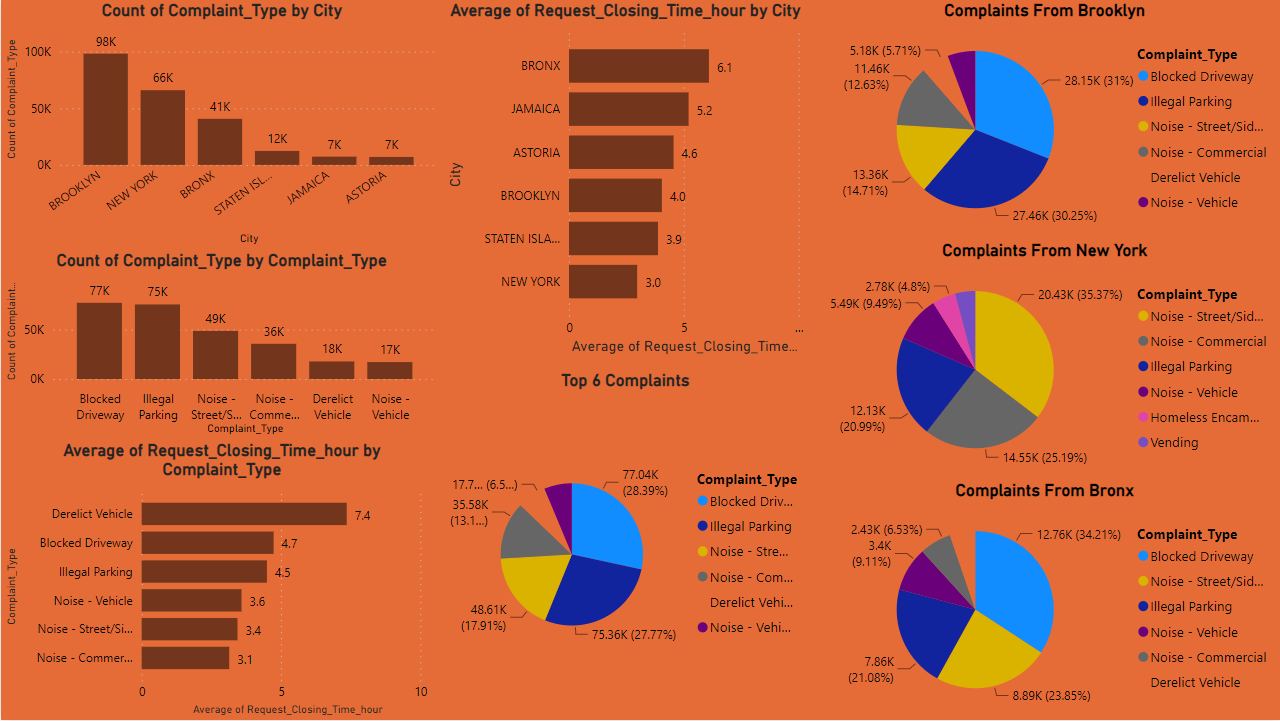

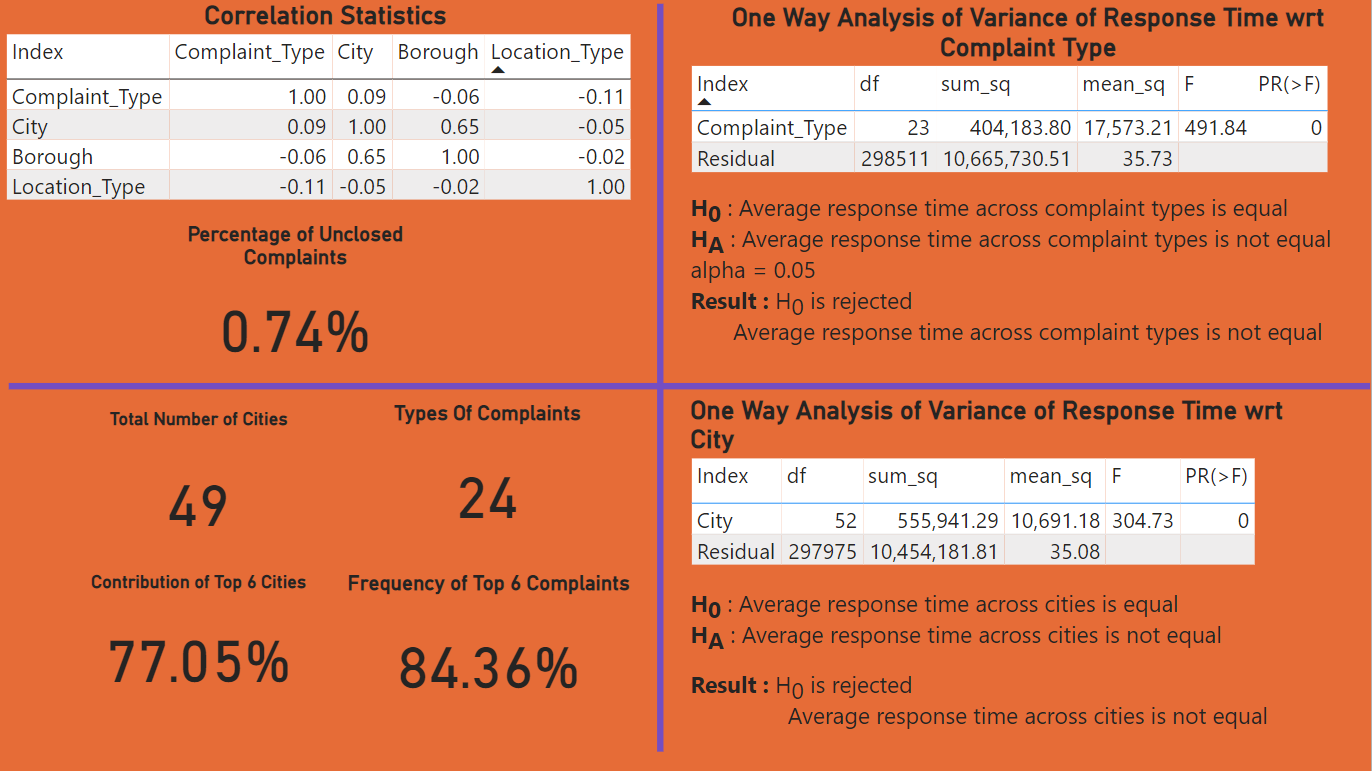

# Conclusions

EDA Conclusions:
1. Out of 49 different cities, 77% complaints originate from only 6 cities
2. Out of 24 different complaint types, top 6 complaint types make up 84.36% of total.
3. Only 0.74% of all the complaints remain unclosed.
4. The most frequently occuring complaints are related to vehecular traffic management
    (i. Blocked Driveway
    ii. Illegal Parking
    iii.Derilicit (abandoned) Vehicle
    iv. Vehicular noise)
5. The average closing time for complaints among top 6 cities is between 3 & 6 hours.
6. The top 6 most frequently occuring complaint types 

Statistical Conclusions:
1. Average response time across different complaint types is not equal
2. Average response time across cities is not equal
3. There is no correlation between Complaint_Type & City
4. There is no correlation between Complaint_Type & Location Type
5. There is no correlation between Complaint_Type & Borough

